### Header with description

**Improvements from third model:**
* To make the network more powerful, updated the same to make it wider and deeper but with total number parameters well within 15000
* Added dropout to address overfitting issue. This will helping reducing training accuracy and improving test accuracy
* Updated LRScheduler values. This time starting LR is ~0.01 and reducing it by half after every 10 epochs

**Achievments**
* Test accuracy is now 99.52% while train accuracy is 99.59%

### Import Libraries and modules

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


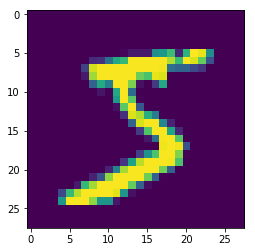

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Build Model

In [31]:
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1), use_bias=False)) # 26, RF=3x3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False)) #24, RF=5x5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu', use_bias=False)) #22, RF=7x7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(8, 1, activation='relu', use_bias=False)) #22, RF=7x7
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) #11, RF=14x14

model.add(Convolution2D(8, 3, 3, activation='relu', use_bias=False)) #9, RF=16x16
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False)) #7, RF=18x18
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False)) #5, RF=20x20
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False)) #3, RF=22x22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu', use_bias=False)) #3, RF=22x22
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, use_bias=False))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/p

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1152      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4608      
__________

### Checkpoint Configuration to save the best model

In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!pip install -q h5py pyyaml
from keras.models import model_from_json

In [14]:
!ls "/content/gdrive/My Drive/EVA"

S3V2  S4


In [0]:
from keras.callbacks import *
filepath="/content/gdrive/My Drive/EVA/S4/FOURTH/epochs:{epoch:03d}-val_acc:{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')

In [0]:
callbacks_list = [checkpoint]

### Compile and Train the model

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  if epoch % 10 == 0:
    lr = lr * 0.5
  return lr

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.02),
             metrics=['accuracy'])

callbacks_list = [LearningRateScheduler(scheduler, verbose=1), checkpoint]

In [38]:
model.fit(X_train, Y_train, batch_size=256, validation_data=(X_test, Y_test), nb_epoch=40, callbacks=callbacks_list, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.009999999776482582.
60000/60000 [==============================] - 9s 147us/step - loss: 0.0893 - acc: 0.9728 - val_loss: 0.1711 - val_acc: 0.9570

Epoch 00001: val_acc improved from -inf to 0.95700, saving model to /content/gdrive/My Drive/EVA/S4/FOURTH/epochs:001-val_acc:0.9570.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.009999999776482582.
60000/60000 [==============================] - 5s 81us/step - loss: 0.0647 - acc: 0.9797 - val_loss: 0.0444 - val_acc: 0.9861

Epoch 00002: val_acc improved from 0.95700 to 0.98610, saving model to /content/gdrive/My Drive/EVA/S4/FOURTH/epochs:002-val_acc:0.9861.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.009999999776482582.
60000/60000 [==============================] - 5s 81us/step - loss: 0.0525 - acc: 0.9835 - val_loss: 0.0330 - val_acc: 0.9908

Epoch 0

### Load the best model and evaluate on test data

In [0]:
from keras.models import load_model
# Take the best saved model as printed in the above code block
modelPath = r'/content/gdrive/My Drive/EVA/S4/FOURTH/epochs:035-val_acc:0.9952.hdf5'
model = load_model(modelPath)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [41]:
print(score)

[0.018647597733735893, 0.9952]


In [0]:
y_pred = model.predict(X_test)

In [43]:
print(y_pred[:9])
print(y_test[:9])

[[4.4306551e-11 6.8768614e-08 5.4918274e-08 8.8720334e-08 2.9327941e-07
  6.0152296e-09 2.0409859e-12 9.9999905e-01 3.8985412e-11 3.9241792e-07]
 [1.7105074e-09 7.8554834e-09 1.0000000e+00 7.0637509e-09 3.6092840e-09
  4.8470478e-10 1.0563855e-08 5.2888957e-11 1.2818546e-08 6.8689190e-13]
 [6.6938384e-07 9.9998403e-01 1.0492111e-06 1.2461882e-07 2.3584948e-06
  1.4536392e-06 2.5528980e-06 7.0647002e-06 2.8098501e-07 3.6913903e-07]
 [9.9999392e-01 5.9122720e-12 1.8269232e-09 5.2766897e-08 3.4746347e-10
  1.1287215e-08 3.5795138e-06 3.3969574e-09 1.3574399e-06 1.1449207e-06]
 [4.1339879e-11 6.6340528e-10 3.8491189e-12 4.1561107e-10 9.9999762e-01
  4.5417373e-10 3.9595784e-09 8.3689002e-08 2.9509841e-09 2.3164830e-06]
 [3.6314529e-07 9.9997878e-01 1.0643812e-06 1.8878524e-07 2.0831349e-06
  6.1746653e-07 1.3326621e-06 1.5043537e-05 1.6421244e-07 3.2757575e-07]
 [6.8435735e-10 3.5220995e-07 9.2405816e-10 2.6386200e-09 9.9982077e-01
  2.7488932e-07 8.6821800e-10 6.2100080e-06 3.2413584e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [47]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored